### Module 13: More About MapReduce

Using the matrix-vector multiplication described in Section 2.3.1, applied to the matrix and vector:

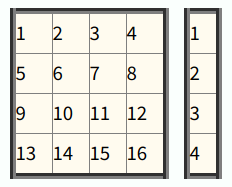

In [1]:
from IPython.display import Image
Image(filename='multiplication.png')

Apply the Map function to this matrix and vector.

In [8]:
import numpy as np

matrix = np.array([[ 1,  2,  3,  4],
                   [ 5,  6,  7,  8],
                   [ 9, 10, 11, 12],
                   [13, 14, 15, 16]])

vector = np.array([1, 2, 3, 4]).T

def map(i, j, element, vector):
    return (i + 1Suppose we have the following relations:, element * vector[j])

for i, row in enumerate(matrix):
    for j, element in enumerate(row):
        output = map(i, j, element, vector)
        print(output)

(1, 1)
(1, 4)
(1, 9)
(1, 16)
(2, 5)
(2, 12)
(2, 21)
(2, 32)
(3, 9)
(3, 20)
(3, 33)
(3, 48)
(4, 13)
(4, 28)
(4, 45)
(4, 64)


Suppose we have the following relations:

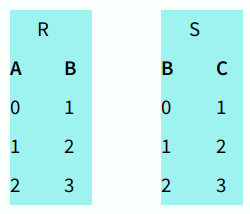

In [9]:
Image(filename='relations.png')

And we take their natural join by the algorithm of Section 2.3.7. Apply the Map function to the tuples of these relations. Then, construct the elements that are input to the Reduce function.

In [13]:
from collections import defaultdict

R = S = [(0, 1),
         (1, 2),
         (2, 3)]

def map(relation_name, components):
    if relation_name == 'R':
        c1, c2 = components
    elif relation_name == 'S':
        c2, c1 = components
    else:
        raise ValueError
    return (c2, (relation_name, c1))

reducer_input = defaultdict(list)

for row in R:
    output = map('R', row)
    reducer_input[output[0]].append(output[1])
for row in S:
    output = map('S', row)
    reducer_input[output[0]].append(output[1])

for key, values in reducer_input.items():
    print('Key: {}, Values: {}'.format(key, values))

Key: 1, Values: [('R', 0), ('S', 2)]
Key: 2, Values: [('R', 1), ('S', 3)]
Key: 3, Values: [('R', 2)]
Key: 0, Values: [('S', 1)]


Suppose we use the two-stage algorithm of Section 2.3.9 to compute the product of matrices M and N. Let M have x rows and y columns, while N has y rows and z columns. As a function of x, y, and z, express the answers to the following questions:

1. The output of the first Map function has how many different keys? How many key-value pairs are there with each key? How many key-value pairs are there in all?
2. The output of the first Reduce function has how many keys? What is the length of the value (a list) associated with each key?
3. The output of the second Map function has how many different keys? How many key-value pairs are there with each key? How many key-value pairs are there in all?

In [ ]:
# 1a) The first Map function produces the key-value pair (j, (M, i, m_ij))
# for each matrix element m_ij in M. Likewise, it produces the key-value pair
# (j, (N, k, n_jk)) for each matrix element n_jk in N.
# Since matrix M has y columns and matrix N has y rows, there are y keys.

# 1b) Matrix M has x rows, so there are x elements in each column j.
# Matrix N has z columns, so there are z elements in each row j.
# Therefore there are (x+z) key-value pairs for each key j.

# 1c) There are y(x+z) key-value pairs in all.

# 2a) The first Reduce function examines the list of values associated with a key j.
# For each value that comes from M (M, i, m_ij) and each value that comes from N (N, k, n_jk),
# it produces a key-value pair with key (i, k) and value m_ij * n_jk.
# There are x rows in matrix M and z columns in matrix N, so the output has xz keys.

# 2b) The length of the value is 1, since it is just the product m_ij * n_jk.

# 3a) The second Map function is just the identity; it produces the key-value pair (i, k)
# for each input element with key (i, k). Therefore there are xz keys.

# 3b) Each key is associated with y key-value pairs.

# 3c) There are xyz key-value pairs in all.

Suppose we use the one-stage algorithm of Section 2.3.10 to compute the product of matrices M and N. Let M have x rows and y columns, while N has y rows and z columns. As a function of x, y, and z, express the answers to the following questions:

1. The output of the Map function has how many different keys? How many key-value pairs are there with each key? How many key-value pairs are there in all?
2. The input to the Reduce function has how many keys? What is the length of the value (a list) associated with each key?

In [ ]:
# 1a) The Map function produces all the key-value pairs ((i, k), (M, j, m_ij))
# for k up to the number of columns of N. 
# Similarly, it produces all the key-value pairs ((i, k), (N, j, n_jk))
# for i up to the number of rows of M.
# Since there are x rows in matrix M and z columns in matrix N, there are xz different keys.

# 1b) There are y columns in matrix M and y rows in matrix N, so there are y pairs for each key.

# 1c) Each of the xy elements of matrix M is mapped to z different key-value pairs.
# Each of the yz elements of matrix N is mapped to x different key-value pairs.
# Hence, there are 2xyz key-value pairs in all.

# 2a) The input to the Reduce function is the output of the Map function, so there are xz keys.

# 2b) There are 2xyz / xz = 2y values associated with each key.